In [333]:
#WFO scanner; Author: Charlie smith

In [334]:
import numpy as np
import pandas as pd
import webbrowser
import os
import datetime
import urllib.request
import urllib
import re
import sys
import textwrap
from nltk.tokenize import sent_tokenize, word_tokenize
from bs4 import BeautifulSoup
import zipfile
from sumy.parsers.plaintext import PlaintextParser
from sumy.nlp.tokenizers import Tokenizer
from sumy.summarizers.lsa import LsaSummarizer
import geopandas as gpd
import numpy as np
from datetime import datetime
from datetime import datetime, timedelta 
import matplotlib.pyplot as plt
import matplotlib.colors
from matplotlib.pyplot import figure
from matplotlib.pyplot import Axes
import geoplot
import geoplot.crs as gcrs
from mpl_toolkits.axes_grid1 import make_axes_locatable
import plotly.graph_objects as go
start = datetime.now()
date = datetime.today().strftime('%Y_%m_%d')
date1 = datetime.today().strftime('%Y-%m-%d')

In [335]:
wfo_list = pd.read_excel('WFO_list.xlsx')

wfo_city = wfo_list['City']
wfo_city = wfo_city.astype(str)
wfo_city= wfo_city.values

wfo_state = wfo_list['State']
wfo_state = wfo_state.astype(str)
wfo_state = wfo_state.values

wfo_region = wfo_list['Region']
wfo_region = wfo_region.astype(str)
wfo_region = wfo_region.values

wfo_st_ab = wfo_list['St_ab']
wfo_st_ab = wfo_st_ab.astype(str)
wfo_st_ab = wfo_st_ab.values

wfo_list = wfo_list['CWA']
wfo_list = wfo_list.astype(str)
wfo_list= wfo_list.values
wfo_list = list(wfo_list)

In [336]:
wfo_messages = pd.DataFrame()

In [337]:

for i in range(0,len(wfo_list))[0:500]:
    try:
        wfo_id = wfo_list[i]
        
        #Open and Read Webpage
        url = 'https://forecast.weather.gov/product.php?site='+wfo_id+'&issuedby='+wfo_id+'&product=AFD&format=txt&version=1&glossary=0'
        afd = urllib.request.urlopen(url).read()
        html_content = afd

        # Parse the HTML content
        soup = BeautifulSoup(html_content, 'html.parser')

        # Find the <pre> tag with class 'glossaryProduct'
        pre_tag = soup.find('pre', class_='glossaryProduct')

        if pre_tag:
            # Extract and print the text inside the <pre> tag
            x = pre_tag.get_text(strip=True)

        else:
            print("Tag not found")
        x = str(x)
        x = x.replace('\n', ' ')
        x = x.replace('...', '. ')
        x = x.replace('...', '. ')

        #create empty list
        hydro_list = []

        #Extract sentenses with "Flood" or other related terms

        text = x

        # Regular expression pattern to find the month abbreviations with spaces on either side
        month_pattern = r'\b(?:Jan|Feb|Mar|Apr|May|Jun|Jul|Aug|Sep|Oct|Nov|Dec)\b'

        # Search for the month abbreviations in the text
        matches = re.finditer(month_pattern, text)

        # Extract the month along with 15 characters before and 8 characters after for each match
        for match in matches:
            start_index = max(match.start() - 16, 0)
            end_index = min(match.end() + 8, len(text))
            issuance = text[start_index:end_index]



        words = ['flood']
        sentences = sent_tokenize(text)
        for sentence in sentences:
            if (all(map(lambda word: word in sentence, words))):
                hydro_list.append(sentence)
                
                
        words = ['Flood']
        sentences = sent_tokenize(text)
        for sentence in sentences:
            if (all(map(lambda word: word in sentence, words))):
                hydro_list.append(sentence)
                
        words = ['flooding']
        sentences = sent_tokenize(text)
        for sentence in sentences:
            if (all(map(lambda word: word in sentence, words))):
                hydro_list.append(sentence)

        words = ['debris']
        sentences = sent_tokenize(text)
        for sentence in sentences:
            if (all(map(lambda word: word in sentence, words))):
                hydro_list.append(sentence)

        words = ['flash']
        sentences = sent_tokenize(text)
        for sentence in sentences:
            if (all(map(lambda word: word in sentence, words))):
                hydro_list.append(sentence)

        words = ['landslide']
        sentences = sent_tokenize(text)
        for sentence in sentences:
            if (all(map(lambda word: word in sentence, words))):
                hydro_list.append(sentence)
                
        words = ['ice jam']
        sentences = sent_tokenize(text)
        for sentence in sentences:
            if (all(map(lambda word: word in sentence, words))):
                hydro_list.append(sentence)
                
        words = ['river ice']
        sentences = sent_tokenize(text)
        for sentence in sentences:
            if (all(map(lambda word: word in sentence, words))):
                hydro_list.append(sentence)

        words = ['burn scar']
        sentences = sent_tokenize(text)
        for sentence in sentences:
            if (all(map(lambda word: word in sentence, words))):
                hydro_list.append(sentence)
                
        words = ['burn area']
        sentences = sent_tokenize(text)
        for sentence in sentences:
            if (all(map(lambda word: word in sentence, words))):
                hydro_list.append(sentence)
                
        words = ['mudslide']
        sentences = sent_tokenize(text)
        for sentence in sentences:
            if (all(map(lambda word: word in sentence, words))):
                hydro_list.append(sentence)
                
        words = ['life-threatening']
        sentences = sent_tokenize(text)
        for sentence in sentences:
            if (all(map(lambda word: word in sentence, words))):
                hydro_list.append(sentence)                

        words = ['life threatening']
        sentences = sent_tokenize(text)
        for sentence in sentences:
            if (all(map(lambda word: word in sentence, words))):
                hydro_list.append(sentence) 
                
        words = ['snowmelt']
        sentences = sent_tokenize(text)
        for sentence in sentences:
            if (all(map(lambda word: word in sentence, words))):
                hydro_list.append(sentence) 
                
        words = ['SWE']
        sentences = sent_tokenize(text)
        for sentence in sentences:
            if (all(map(lambda word: word in sentence, words))):
                hydro_list.append(sentence) 
                                
                

        #ave as data frame
        hydro_list = pd.DataFrame(np.array(hydro_list))
        hydro_list = hydro_list.rename(columns={0: "Statement"})
        hydro_list = hydro_list.drop_duplicates()
        
        hydro_list['Issued'] = issuance
        hydro_list['WFO'] = wfo_id
        hydro_list['City'] = wfo_city[i]
        hydro_list['State'] = wfo_state[i]
        hydro_list['Region'] = wfo_region [i]
        hydro_list['value'] = len(hydro_list.index)
        hydro_list['URL'] = url
        
        
        # Text to summarize using Sumy
        # Combine the column into one string with a space separator
        text_to_sumy = hydro_list['Statement'].str.cat(sep=' ')

        # Parse the text
        parser = PlaintextParser.from_string(text_to_sumy, Tokenizer("english"))

        # Initialize the LSA summarizer
        summarizer = LsaSummarizer()

        # Summarize the text (let's summarize to 2 sentences)
        summary = summarizer(parser.document, 2)             

        # Convert the summary to plain text
        summary = '<br>'.join(str(sentence) for sentence in summary)
        
        n = 50  # The nth space where you want to insert the newline

        # Initialize a space counter
        space_count = 0

        # Iterate over the text to find the nth space
        for i, char in enumerate(summary):
            if char == ' ':
                space_count += 1
                if space_count == n:
                    # Insert a newline character at the nth space
                    new_summary = summary[:i] + '<br>' + summary[i + 1:]
                    break
        else:
            # If the nth space is not found, the text remains unchanged
            new_summary = summary
      

        
        hydro_list['Summary'] = new_summary
        

        wfo_messages = wfo_messages.append(hydro_list)
        

    except:
        pass


C:\Users\david.smith\AppData\Local\Temp\ipykernel_3532\869760755.py:193: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\david.smith\AppData\Local\Temp\ipykernel_3532\869760755.py:193: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\david.smith\AppData\Local\Temp\ipykernel_3532\869760755.py:193: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\david.smith\AppData\Local\Temp\ipykernel_3532\869760755.py:193: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\david.smith\AppData\Local\Temp\ipykernel_3532\869760755.py:193: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a futu

In [338]:
wfo_messages.to_csv('wfo_messages.csv')


In [339]:
wfo_messages['URL'] = wfo_messages['URL'].astype(str)
wfo_messages  =  wfo_messages.reset_index(drop=True)
wfo_messages = wfo_messages.set_index('State').reset_index()
wfo_messages = wfo_messages.set_index('City').reset_index()
wfo_messages = wfo_messages.set_index('WFO').reset_index()
wfo_messages = wfo_messages.sort_values(['Region', 'State', 'City'], ascending=[True, True, True])
wfo_messages = wfo_messages.reset_index()
wfo_messages = wfo_messages.drop(columns=['index'])

In [340]:
def make_clickable(val):
    # target _blank to open new window
    return '<a target="_blank" href="{}">{}</a>'.format(val, val)

wfo_messages.style.format({'URL': make_clickable})

,WFO,City,State,Statement,Issued,Region,value,URL,Summary
0,AFG,Fairbanks,Alaska,"High water from snowmelt will make its way down rivers on the Central North Slope over the next several days, and minor flooding remains possible.",604 AM AKDT Wed Jun 12 2024,Alaska,4,https://forecast.weather.gov/product.php?site=AFG&issuedby=AFG&product=AFD&format=txt&version=1&glossary=0,"High water from snowmelt will make its way down rivers on the Central North Slope over the next several days, and minor flooding remains possible.Water will be near bankfull, with minor flooding possible in low lying areas downstream of Pump Station 3 over the next several days."
1,AFG,Fairbanks,Alaska,"Water will be near bankfull, with minor flooding possible in low lying areas downstream of Pump Station 3 over the next several days.",604 AM AKDT Wed Jun 12 2024,Alaska,4,https://forecast.weather.gov/product.php?site=AFG&issuedby=AFG&product=AFD&format=txt&version=1&glossary=0,"High water from snowmelt will make its way down rivers on the Central North Slope over the next several days, and minor flooding remains possible.Water will be near bankfull, with minor flooding possible in low lying areas downstream of Pump Station 3 over the next several days."
2,AFG,Fairbanks,Alaska,Minor flooding of low lying areas along the Colville River downstream of Nuiqsut is possible.,604 AM AKDT Wed Jun 12 2024,Alaska,4,https://forecast.weather.gov/product.php?site=AFG&issuedby=AFG&product=AFD&format=txt&version=1&glossary=0,"High water from snowmelt will make its way down rivers on the Central North Slope over the next several days, and minor flooding remains possible.Water will be near bankfull, with minor flooding possible in low lying areas downstream of Pump Station 3 over the next several days."
3,AFG,Fairbanks,Alaska,"On the Kuparuk River at the Bridge, flooding is occuring.",604 AM AKDT Wed Jun 12 2024,Alaska,4,https://forecast.weather.gov/product.php?site=AFG&issuedby=AFG&product=AFD&format=txt&version=1&glossary=0,"High water from snowmelt will make its way down rivers on the Central North Slope over the next several days, and minor flooding remains possible.Water will be near bankfull, with minor flooding possible in low lying areas downstream of Pump Station 3 over the next several days."
4,BOU,Denver,Colorado,Long skinny model soundings and PWATs increasing between 0.80-1.00 inch may lead to localized flooding mainly for the urban corridor and plains.,334 AM MDT Wed Jun 12 2024,Central,3,https://forecast.weather.gov/product.php?site=BOU&issuedby=BOU&product=AFD&format=txt&version=1&glossary=0,"Issued at 334 AM MDT Wed Jun 12 2024 Elevated flows continue across the upper Colorado River basin in Grand County, with Flood Advisories in effect for streams above Granby and Grand Lake.This pattern will likely lead to additional snowmelt on the higher peaks increasing watershed flows."
5,BOU,Denver,Colorado,"Issued at 334 AM MDT Wed Jun 12 2024 Elevated flows continue across the upper Colorado River basin in Grand County, with Flood Advisories in effect for streams above Granby and Grand Lake.",334 AM MDT Wed Jun 12 2024,Central,3,https://forecast.weather.gov/product.php?site=BOU&issuedby=BOU&product=AFD&format=txt&version=1&glossary=0,"Issued at 334 AM MDT Wed Jun 12 2024 Elevated flows continue across the upper Colorado River basin in Grand County, with Flood Advisories in effect for streams above Granby and Grand Lake.This pattern will likely lead to additional snowmelt on the higher peaks increasing watershed flows."
6,BOU,Denver,Colorado,This pattern will likely lead to additional snowmelt on the higher peaks increasing watershed flows.,334 AM MDT Wed Jun 12 2024,Central,3,https://forecast.weather.gov/product.php?site=BOU&issuedby=BOU&product=AFD&format=txt&version=1&glossary=0,"Issued at 334 AM MDT Wed Jun 12 2024 Elevated flows continue across the upper Colorado River basin in Grand County, with Flood Advisories in effect for streams above Granby and Grand Lake.T

In [341]:
wfo_messages = wfo_messages.dropna()
wfo_messages.to_html('wfo_messages.html', render_links=True)
wfo_messages.to_csv('wfo_messages.csv')
wfo_messages1 = wfo_messages.copy()

In [342]:
wfo_loc = gpd.read_file('w_10nv20.shp')
wfo_messages = pd.merge(wfo_loc[['WFO', 'geometry']], wfo_messages[['WFO', 'City', 'Issued','Statement', 'URL', 'value', 'Summary']], left_on='WFO', right_on='WFO', how='left')
#df_merged = df_merged.dropna(subset=['percent_unemployed', 'geometry']).set_index('LGA_CODE20')


In [343]:
wfo_loc = gpd.read_file('w_10nv20.shp')

In [344]:
wfo_messages = wfo_messages.dropna()


(-177.21420845007987,
 -59.20127055187441,
 -18.661933764191808,
 75.67777905561898)

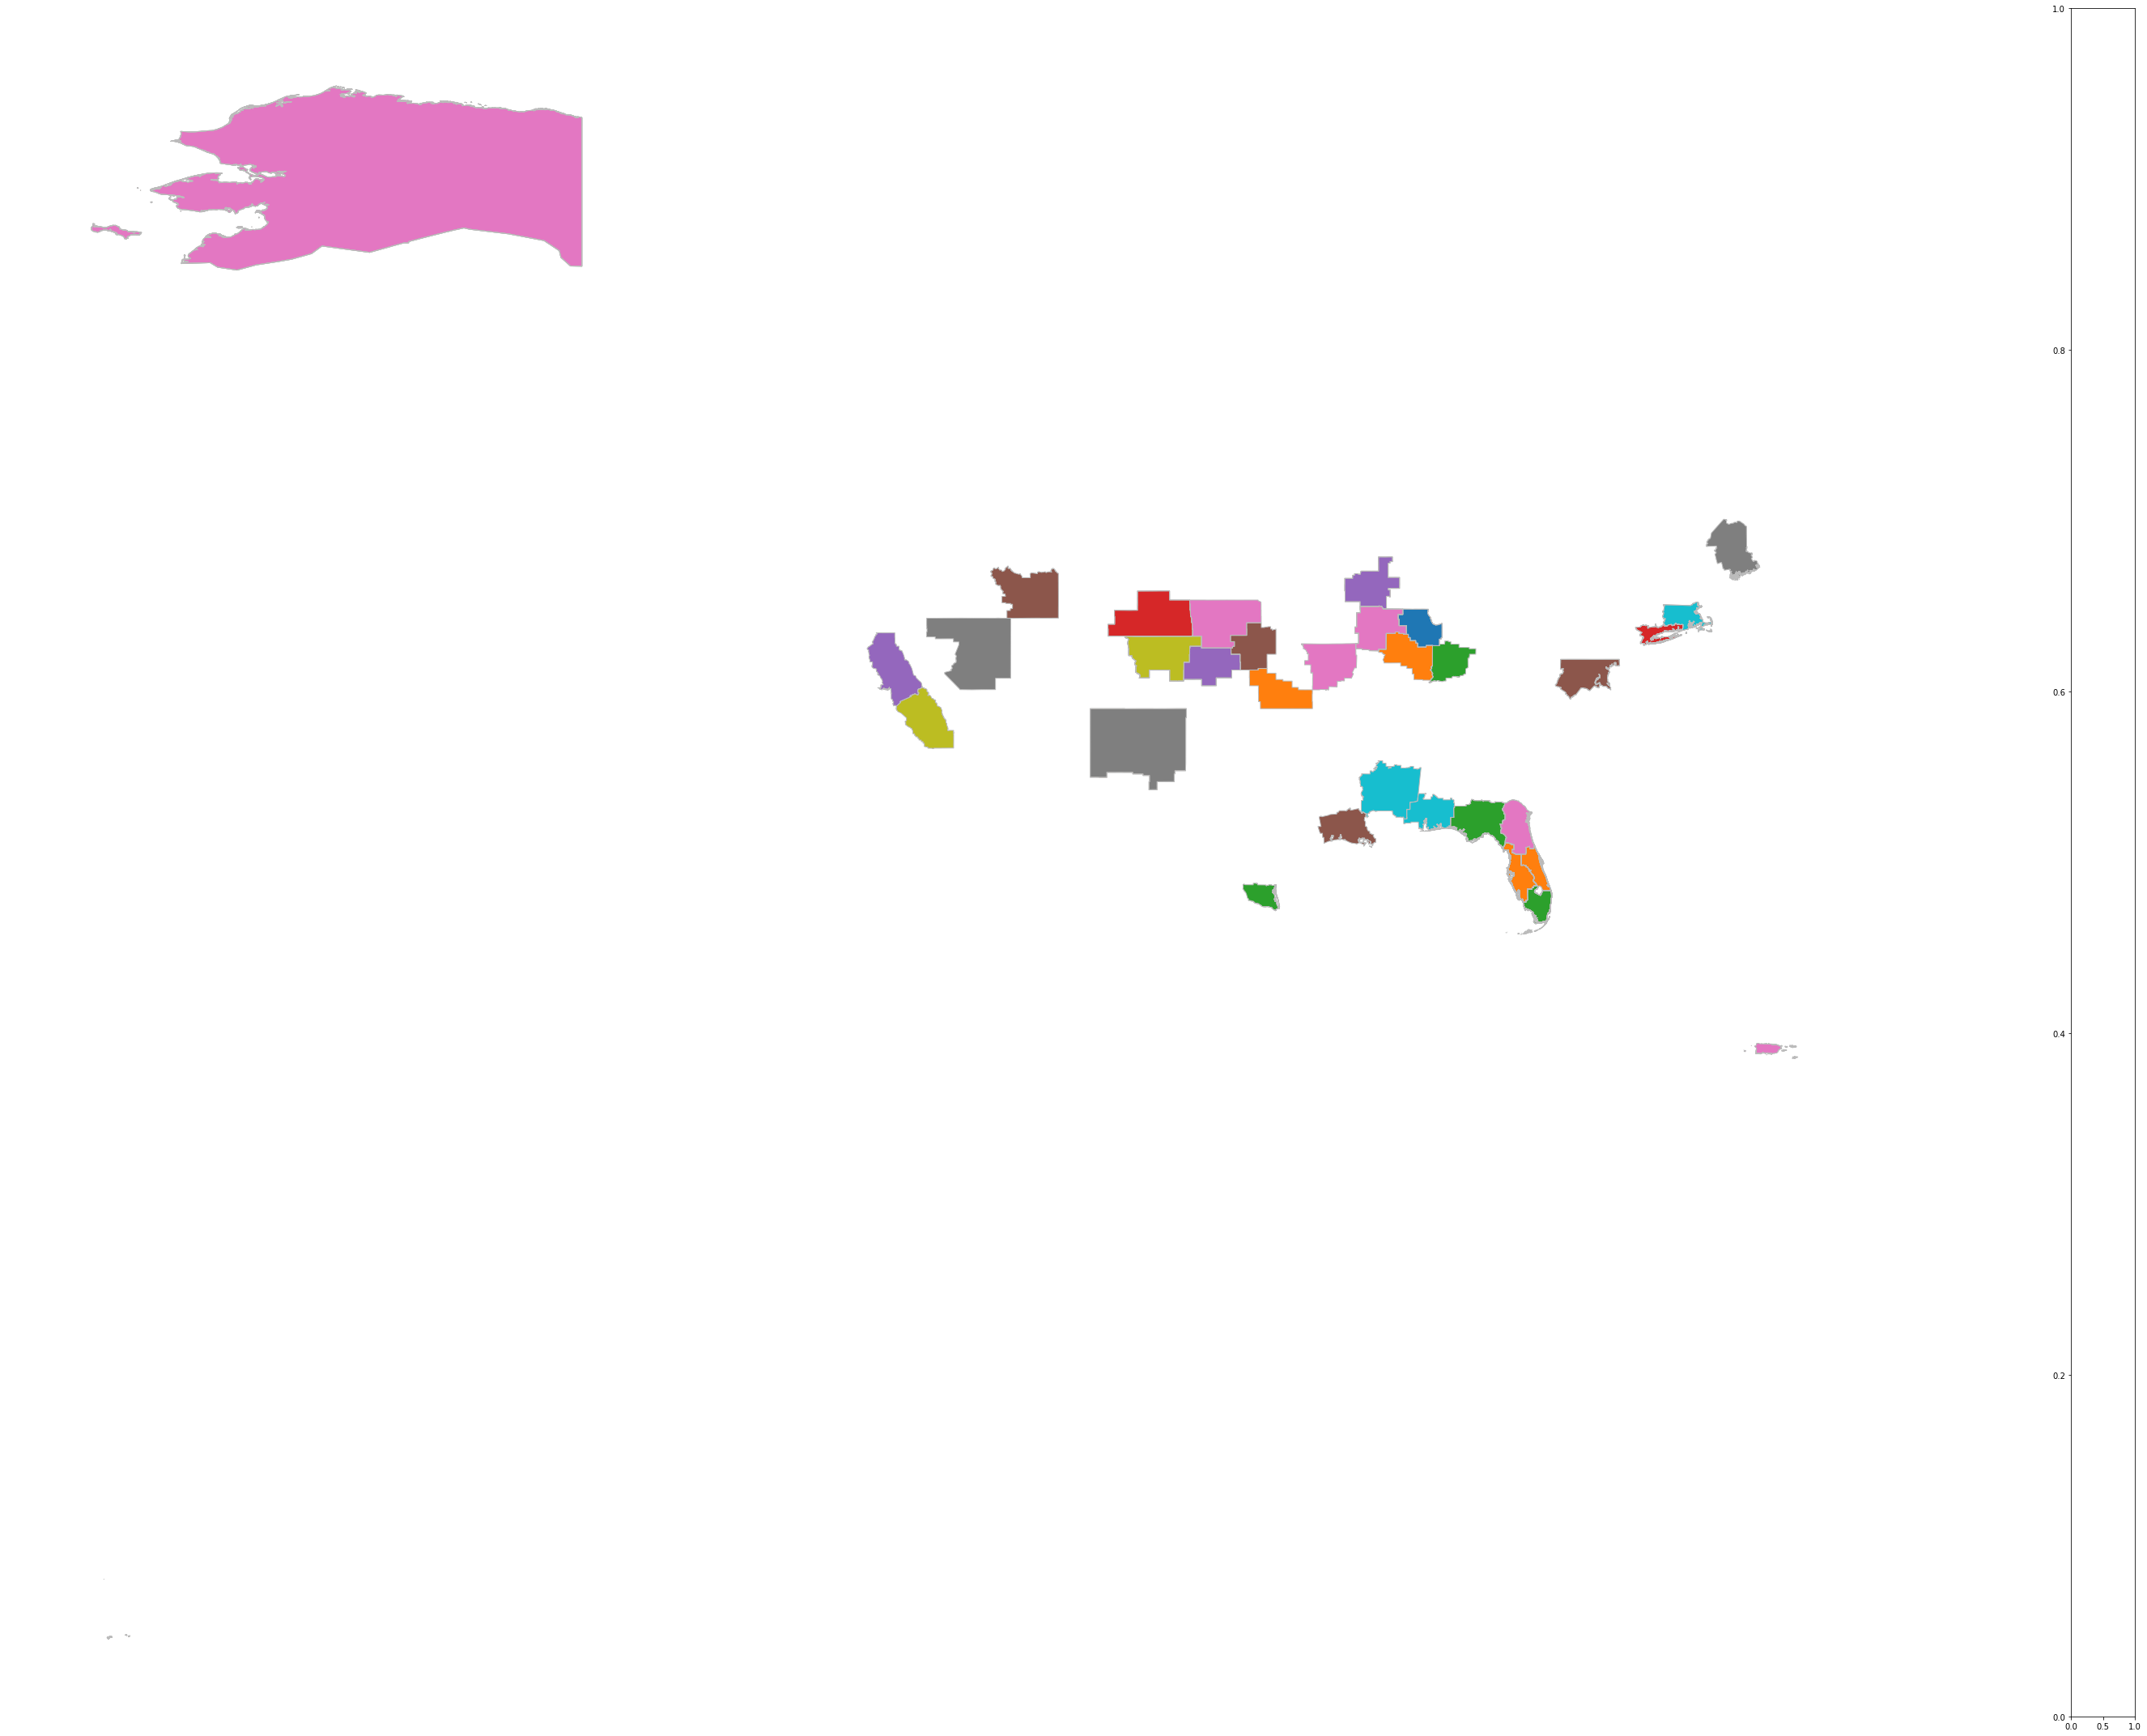

In [345]:
# OPTIONAL: Display using geopandas
fig, ax = plt.subplots(1,1, figsize=(50,50))
divider = make_axes_locatable(ax)
tmp = wfo_messages.copy()

cax = divider.append_axes("right", size="3%", pad=1) #resize the colorbar
tmp.plot(column='Statement', ax=ax,cax=cax, legend=False)
tmp.geometry.boundary.plot(color='#BBBBBB', ax=ax, linewidth=1) #Add some borders to the geometries
ax.axis('off')

In [346]:
wfo_messages = wfo_messages.to_crs(epsg=4326) # convert the coordinate reference system to lat/long
lga_json = wfo_messages.__geo_interface__ #covert to geoJSON

In [347]:
MAPBOX_ACCESSTOKEN = 'pk.eyJ1IjoiZGF2aWRjc21pdGgiLCJhIjoiY2trYTVxNGdzMGNzbzJ2cjE5ZjZ4NDBvOSJ9.mxK6SMEyWvPz0PGMYyCaIg'

zmin = wfo_messages.value.min()
zmax = wfo_messages.value.max()


# Set the data for the map
data = go.Choroplethmapbox(
        geojson = lga_json,             #this is your GeoJSON
        locations = wfo_messages.index,    #the index of this dataframe should align with the 'id' element in your geojson
        z = wfo_messages.value, #sets the color value
        text = wfo_messages.WFO+'--'+wfo_messages.City+'--'+wfo_messages.Issued+'<br>'+wfo_messages.Summary,    #sets text for each shape
        colorbar=dict(thickness=20, ticklen=0, tickformat='', outlinewidth=.1), #adjusts the format of the colorbar
        marker_line_width=0.8, marker_opacity=.5, colorscale="blues", #adjust format of the plot
        zmin=zmin, zmax=zmax,           #sets min and max of the colorbar
        hovertemplate = "<b>%{text}</b><br>" +
                    
                    "<extra></extra>")  # sets the format of the text shown when you hover over each shape

# Set the layout for the map
layout = go.Layout(
    title = {'text': f"WFO's Messaging Flooding",
            'font': {'size':24}},       #format the plot title
    mapbox1 = dict(
        domain = {'x': [0, 1],'y': [0, 1]}, 
        center = dict(lat=37 , lon=-94),
        accesstoken = MAPBOX_ACCESSTOKEN, 
        zoom = 3),                      
    autosize=True,
    height=650,
    margin=dict(l=0, r=0, t=0, b=0))

# Generate the map
fig=go.Figure(data=data, layout=layout)
fig.write_html('WFOmessages.html')

In [348]:
#Drop Summary for Final table
wfo_messages = wfo_messages1.drop('Summary', axis=1)
wfo_messages.to_html('wfo_messages.html', render_links=True)

In [349]:
from bs4 import BeautifulSoup
soup_original_1 = BeautifulSoup(open('WFOmessages.html'))
soup_original_2 = BeautifulSoup(open('wfo_messages.html'))
for element in soup_original_2.body:
    soup_original_1.body.append(element)


In [350]:
#Save Locollaly
with open("WFO_messaging_app.html", "w", encoding='utf-8') as file:
    file.write(str(soup_original_1))

In [351]:
#For saving on WPOD Drive
#with open("//nwcal-fs2/WPOD/research_projects/WFO_AFD_Scanner/WFO_messaging_app.html", "w", encoding='utf-8') as file:
#    file.write(str(soup_original_1))

In [352]:

#Open HTML table
webbrowser.open('file://' + os.path.realpath('WFO_messaging_app.html'))

True